<a href="https://colab.research.google.com/github/SuanderGomes/Puc_TCC_Suander/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS NÚCLEO DE EDUCAÇÃO A DISTÂNCIA**

**Pós-graduação Lato Sensu em Ciência de Dados e Big Data**

** **
**Trabalho de Conclusão de Curso**

**ANÁLISE DE CRÉDITO: IDENTIFICANDO BONS E MAUS PAGADORES**

**Suander Gomes de Souza**

In [ ]:
#Importando Bibliotecas
import pandas as pd 
import numpy as np
import seaborn as sab
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import  LabelEncoder

from yellowbrick.classifier import ConfusionMatrix


In [ ]:
#Liberando acesso ao Google Drive para realizar a importação das bases
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#Fora utilizados dois datasets da Kaggle contendo dados de clientes de uma determinada instituição financeira
#Carregando os datasets
data1 = pd.read_csv('/content/gdrive/MyDrive/TCC/application_record.csv', encoding='utf-8')
data2 = pd.read_csv('/content/gdrive/MyDrive/TCC/credit_record.csv', encoding='utf-8')

In [ ]:
#Visualizando o dataset 1
data1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
#Visualizando o dataset 2
data2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


### **LIMPEZA E TRATAMENTO**


O dataset 1 possui 438557 linhas × 18 colunas

In [ ]:
#começando pelo data1, verificando duplicados
len(data1) - len(data1.drop_duplicates('ID'))

47

In [ ]:
#foram encontrado 47 duplicados no data1, vamos remove-los
data1 = data1.drop_duplicates('ID', keep='first')

In [ ]:
#vamos verificar a existência de valores nulos
data1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
#foram encontradas 134193, são muitas linhas, preenher com a moda ou mediana pode criar um viés no modelo, portanto vamos remover
#removendo nulos
data1 = data1.dropna()
data1.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

O dataset 2 possui 1048575 linhas × 3 colunas

In [ ]:
#verificando duplicados no data2
len(data2) - len(data2.drop_duplicates('ID'))

1002590

In [ ]:
#foram encontrado 1002590 registros duplicados no data2, precisamos remove-los
data2 = data2.drop_duplicates('ID', keep='first')

Após a remoção restaram 45985 registros

In [ ]:
#verificando a existência de valores nulos no data2
data2.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Não há valores nulos no dataset 2

Na descrição do dataset é  informado que os arquivos pode ser unificados pelo ID, o dataset 2 tem uma quantidade de registros maior que o dataset 1 portanto após a junção haverá mais valores nulos.

In [ ]:
#Unindo os datasets pelo ID
data = pd.merge(data1, data2, how='left', on=['ID'])
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,C
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22.0,X
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,C
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304312,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0,NaN,NaN
304313,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0,NaN,NaN
304314,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
304315,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN


In [ ]:
#visualizando nulos após junção das bases
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         279183
STATUS                 279183
dtype: int64

In [ ]:
#os valores nulos estão concentrados na classe, como temos quase 300 mil registros nulos vamos optar por excluir
data = data.dropna()
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [ ]:
#visualizando a junção
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,C
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22.0,X
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,C
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301684,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0.0,5
301685,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.0,C
301686,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.0,C
301687,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0.0,2


Na visualização acima é possível perceber que os registros com ID 5008808, 5008809, 5008810 e 5008811 tem exatamente os mesmos dados em todas as colunas exceto MONTHS_BALANCE e STATUS, isso indica que os dados estão duplicados, então devemos fazer a remoção destes com base em todos os atributos.

In [ ]:
#removendo registros que contém os mesmos dados em todos os campos
data = data.drop_duplicates(['CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY',	'CNT_CHILDREN',	'AMT_INCOME_TOTAL',
                             'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',
                             'OCCUPATION_TYPE',	'CNT_FAM_MEMBERS',	'DAYS_BIRTH',	'DAYS_EMPLOYED'], keep='first')
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,C
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0,0
5,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0.0,0
8,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17778,-1194,1,0,0,0,Laborers,2.0,-10.0,X
14,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301670,5143578,M,Y,N,0,157500.0,Working,Incomplete higher,Single / not married,With parents,-9124,-960,1,1,0,0,Drivers,2.0,0.0,0
301673,5146078,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12723,-1132,1,1,1,0,Sales staff,1.0,0.0,C
301676,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,1,0,0,0,Laborers,2.0,0.0,0
301686,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.0,C


Antes de remoção dos duplicados haviam 25134, depois da remoção sobraram apenas 6724 regsitros, portanto haviam 18410 registros duplicados.

In [ ]:
#visualizando os dados do campo que indica a Idade (foi feito uma contagem de dias a partir da data de extração dos dados até o nascimento do cliente)
#o campo DAYS_BIRTH da forma que está apresentado nos impede de fazer uma análise melhor do campo portanto vamos converter os dados para anos
#antes de fazer a conversão vamos verificar se não tem datas inválidas, neste caso valores positivos indicam idades menores que 0
data['DAYS_BIRTH'].max()

-7489

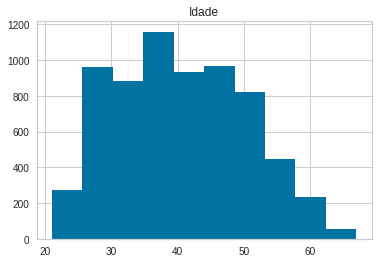

In [ ]:
#convertendo os valores e salvando em uma nova coluna
data['YEARS_AGE'] = round(data['DAYS_BIRTH']/-365,0).astype(int)
plt.hist(data['YEARS_AGE'])
plt.title('Idade');

Também não foi detectado idade maior que 120 anos.

In [ ]:
#visualizando os dados do campo que indica a quantidade de anos que o cliente está empregado
#esse campo apresenta o mesmo problema do anterior também precisamos converter para conseguir fazer uma melhor análise
#neste caso valores positivos indicam que o cliente está desempregado
data['DAYS_EMPLOYED'].max()

-17

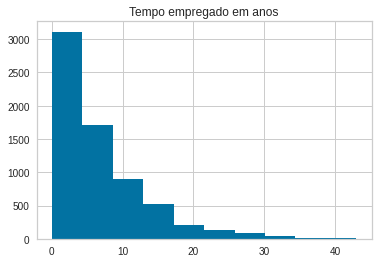

In [ ]:
#convertendo os valores e salvando em uma nova coluna
data['YEARS_EMPLOYED'] = round(data['DAYS_EMPLOYED']/-365,0).astype(int);
plt.hist(data['YEARS_EMPLOYED'])
plt.title('Tempo empregado em anos');

Também não foi detectado nada fora do normal nesta variável

In [ ]:
#o campo que indica a quantidade de membros da familia então com tipo float vamos converter para inteiro 
data['CNT_FAM_MEMBERS'] = round(data['CNT_FAM_MEMBERS']).astype(int)

A nossa classe é a coluna STATUS, essa coluna indica como está a situação dos empréstimo dos clientes de acordo com a descrição abaixo:
Vamos considerar que clientes com até 29 dias de atraso são bons pagadores.

0 indica 1-29 dias em atraso;

1 indica 30-59 dias em atraso;

2 indica 60-89 dias em atraso;

3 indica 90-119 dias em atraso;

4 indica 120-149 dias em atraso;

5 indica mais de 150 dias de atraso;

C indica quitado no mês;

X indica que não houve empréstimo.


In [ ]:
#convertendo conforme explicado acima
data['STATUS'] = data['STATUS'].replace(['1','2','3','4','5'], 'Mau')
data['STATUS'] = data['STATUS'].replace(['C','X','0'], 'Bom')

In [ ]:
#conferindo se a conversão foi feita corretamente
np.unique(data['STATUS'], return_counts=True)

(array(['Bom', 'Mau'], dtype=object), array([6634,   90]))

In [ ]:
#as variáveis abaixo não trazem dados relevantes para o nosso modelo, portanto serão removidas
data = data.drop(columns=['ID'])
data = data.drop(columns=['FLAG_MOBIL'])
data = data.drop(columns=['FLAG_WORK_PHONE'])
data = data.drop(columns=['FLAG_PHONE'])
data = data.drop(columns=['FLAG_EMAIL'])

#as variáveis que foram convertidas em anos também serão removidas
data = data.drop(columns=['DAYS_BIRTH'])
data = data.drop(columns=['DAYS_EMPLOYED'])

#a variável abaixo retorna o mês que os dados foram extraídos, não traz relevência para nosso trabalho, também será removida
data = data.drop(columns=['MONTHS_BALANCE'])

In [ ]:
#vamos verificar como estão os tipos das variaveis
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6724 entries, 0 to 301688
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          6724 non-null   object 
 1   FLAG_OWN_CAR         6724 non-null   object 
 2   FLAG_OWN_REALTY      6724 non-null   object 
 3   CNT_CHILDREN         6724 non-null   int64  
 4   AMT_INCOME_TOTAL     6724 non-null   float64
 5   NAME_INCOME_TYPE     6724 non-null   object 
 6   NAME_EDUCATION_TYPE  6724 non-null   object 
 7   NAME_FAMILY_STATUS   6724 non-null   object 
 8   NAME_HOUSING_TYPE    6724 non-null   object 
 9   OCCUPATION_TYPE      6724 non-null   object 
 10  CNT_FAM_MEMBERS      6724 non-null   int64  
 11  STATUS               6724 non-null   object 
 12  YEARS_AGE            6724 non-null   int64  
 13  YEARS_EMPLOYED       6724 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 788.0+ KB


### **ANÁLISE E EXPLORAÇÃO**

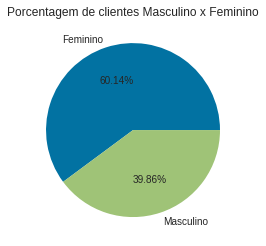

In [ ]:
#serão apresentados gráficos que ajudarão no entendimento dos dados
#o gráfico mostra que a maioria dos clientes é do sexo feminino
plt.pie(data['CODE_GENDER'].value_counts(), labels=['Feminino', 'Masculino'], autopct='%1.2f%%')
plt.title('Porcentagem de clientes Masculino x Feminino')
plt.show()

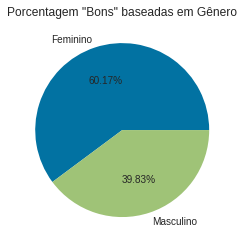

In [ ]:
#também é possível verificar que a maioria dos Bons Clinetes, são do sexo feminino
plt.pie(data[data['STATUS']=='Bom']['CODE_GENDER'].value_counts(), labels=['Feminino', 'Masculino'], autopct='%1.2f%%')
plt.title('Porcentagem "Bons" baseadas em Gênero')
plt.show()

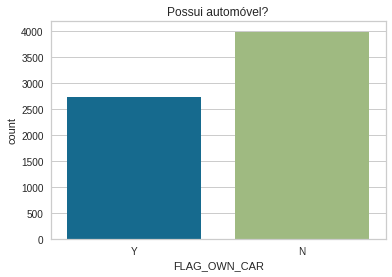

In [ ]:
#visualizando os dados da variável que indica se o cliente possui um automóvel.
sab.countplot(data['FLAG_OWN_CAR']);
plt.title('Possui automóvel?');

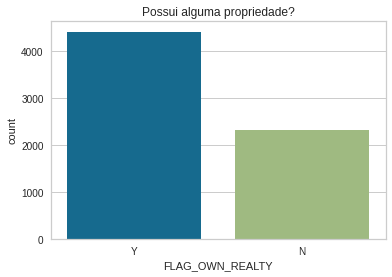

In [ ]:
#o gráfico mostra que a maioria dos clientes possui algum tipo de propriedade
sab.countplot(data['FLAG_OWN_REALTY'])
plt.title("Possui alguma propriedade?");

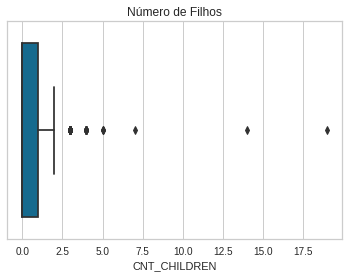

In [ ]:
#o gráfico mostra que a maioria dos cliente tem poucos ou nenhum filho
#também podemos visualizar alguns outiliers porém são vamores aceitáveis e portanto vamos mante-los
sab.boxplot(data['CNT_CHILDREN'])
plt.title("Número de Filhos");

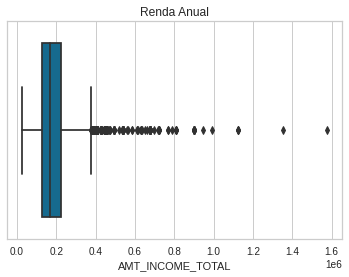

In [ ]:
#o gráfico mostra a distribuição de renda anual dos clientes
#foram detectados alguns outliers, porém como não temos como ter certeza que se tratam de erros de digitação, vamos mante-los 
sab.boxplot(data['AMT_INCOME_TOTAL'])
plt.title("Renda Anual");

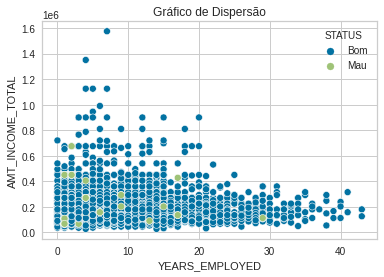

In [ ]:
#o gráfico mostra que quanto menor a renda e os anos de emprego, maior é a concentração de "Maus clientes"
sab.scatterplot(data['YEARS_EMPLOYED'], data['AMT_INCOME_TOTAL'], hue=data['STATUS'])
plt.title('Gráfico de Dispersão')
plt.show()

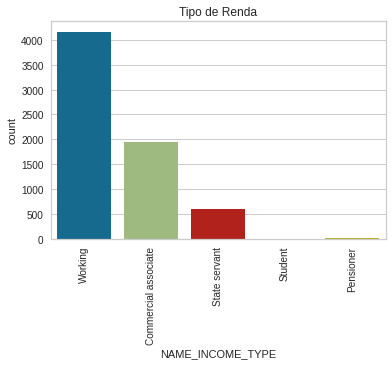

In [ ]:
#o gráfico mostra que a maioria dos clientes estão trabalhando
sab.countplot(data['NAME_INCOME_TYPE'])
plt.xticks(rotation='vertical')
plt.title("Tipo de Renda");

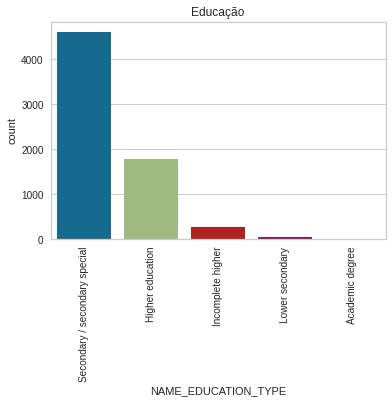

In [ ]:
#o gráfico mostra que grande parte dos clientes ainda não tem ensino superior
sab.countplot(data['NAME_EDUCATION_TYPE'])
plt.xticks(rotation='vertical')
plt.title('Educação');

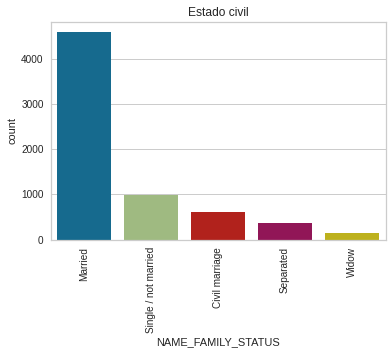

In [ ]:
#o gráfico mostra que a marioria dos clientes são casados
sab.countplot(data['NAME_FAMILY_STATUS'])
plt.xticks(rotation='vertical')
plt.title('Estado civil');

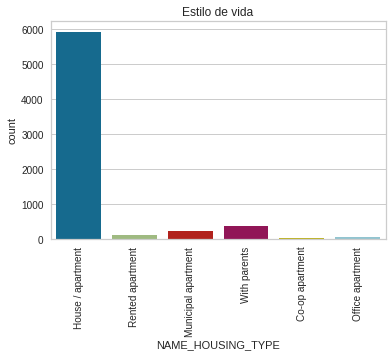

In [ ]:
#o gráfico mostra que a maioria dos clientes vivem em casas ou apartamentos
sab.countplot(data['NAME_HOUSING_TYPE'])
plt.xticks(rotation='vertical')
plt.title('Estilo de vida');

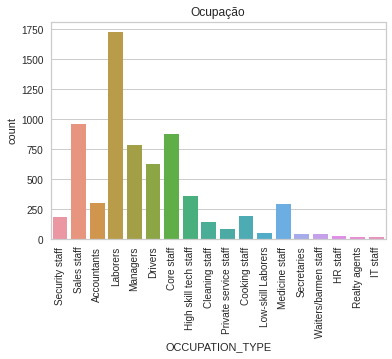

In [ ]:
#visualizando os dados da variável Ocupação
sab.countplot(data['OCCUPATION_TYPE'])
plt.xticks(rotation='vertical')
plt.title('Ocupação');

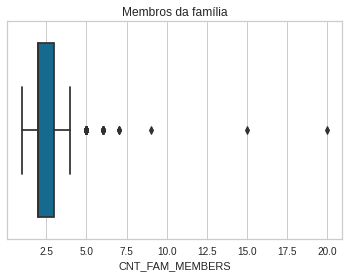

In [ ]:
#visualizando os dados da variável Membros da família.
sab.boxplot(data['CNT_FAM_MEMBERS'])
plt.title('Membros da família');

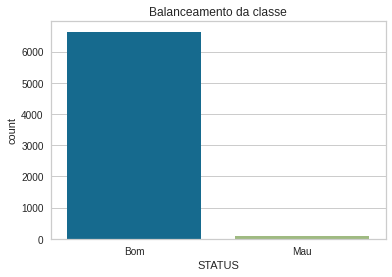

In [ ]:
#Verificando o balanceamento da variável alvo
sab.countplot(data['STATUS'])
plt.title('Balanceamento da classe');

A variável alvo está extremamente desbalanceada, vamos precisar realizar uma técnica de balanceamento de dados. As demais variáveis do dataset não trazem dados relevantes portanto foram removidas

In [ ]:
#vamos copiar os dados para um novo dataset para que os dados originais não sejam afetados
data_corr = data.copy()
data_corr

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,YEARS_AGE,YEARS_EMPLOYED
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,Bom,59,3
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,Bom,52,8
5,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2,Bom,46,2
8,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2,Bom,49,3
14,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,Accountants,2,Bom,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301670,M,Y,N,0,157500.0,Working,Incomplete higher,Single / not married,With parents,Drivers,2,Bom,25,3
301673,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,Bom,35,3
301676,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,2,Bom,56,1
301686,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,Medicine staff,2,Bom,34,4


In [ ]:
#convertendo a classe em numerico para fazer a correlação
data_corr['STATUS'] = data_corr['STATUS'].replace(['Mau'], 1)
data_corr['STATUS'] = data_corr['STATUS'].replace(['Bom'], 0)

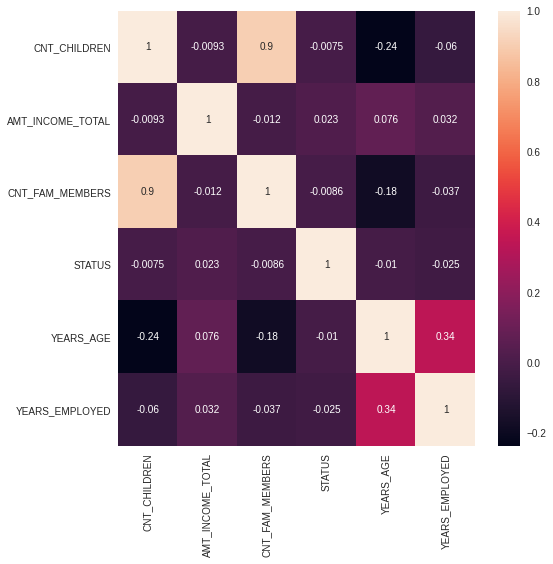

In [ ]:
#mapa de calor das correlações
#o gráfico mostra que nenhuma das variáveis está altamente correlacionada com a classe
plt.figure(figsize = (8,8))
sab.heatmap(data_corr.corr(), annot=True)
plt.show()

### **DEFINIÇÃO DOS MODELOS**

In [ ]:
#os previsores estarão no x e a classe no y
x = data.drop("STATUS", axis=1)
y = data.STATUS

In [ ]:
#verificando os previsores
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_AGE,YEARS_EMPLOYED
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,59,3
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8
5,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2,46,2
8,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2,49,3
14,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,Accountants,2,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301670,M,Y,N,0,157500.0,Working,Incomplete higher,Single / not married,With parents,Drivers,2,25,3
301673,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,35,3
301676,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,2,56,1
301686,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,Medicine staff,2,34,4


In [ ]:
#verificando a classe
y

0         Bom
1         Bom
5         Bom
8         Bom
14        Bom
         ... 
301670    Bom
301673    Bom
301676    Bom
301686    Bom
301688    Bom
Name: STATUS, Length: 6724, dtype: object

In [ ]:
#Para aplicar os modelos aos dados é necessário transformar os dados categóricos em numéricos, vamos fazer isso utilizando o LabelEncoder
#criando as variáveis do LabelEncoder
label_encoder_CODE_GENDER = LabelEncoder()
label_encoder_FLAG_OWN_CAR = LabelEncoder()
label_encoder_FLAG_OWN_REALTY = LabelEncoder()
label_encoder_NAME_INCOME_TYPE = LabelEncoder()
label_encoder_NAME_EDUCATION_TYPE = LabelEncoder()
label_encoder_NAME_FAMILY_STATUS = LabelEncoder()
label_encoder_NAME_HOUSING_TYPE = LabelEncoder()
label_encoder_OCCUPATION_TYPE = LabelEncoder()

In [ ]:
#transformando os dados categóricos em numéricos
x.iloc[:,0] = label_encoder_CODE_GENDER.fit_transform(x.iloc[:,0])
x.iloc[:,1] = label_encoder_FLAG_OWN_CAR.fit_transform(x.iloc[:,1])
x.iloc[:,2] = label_encoder_FLAG_OWN_REALTY.fit_transform(x.iloc[:,2])
x.iloc[:,5] = label_encoder_NAME_INCOME_TYPE.fit_transform(x.iloc[:,5])
x.iloc[:,6] = label_encoder_NAME_EDUCATION_TYPE.fit_transform(x.iloc[:,6])
x.iloc[:,7] = label_encoder_NAME_FAMILY_STATUS.fit_transform(x.iloc[:,7])
x.iloc[:,8] = label_encoder_NAME_HOUSING_TYPE.fit_transform(x.iloc[:,8])
x.iloc[:,9] = label_encoder_OCCUPATION_TYPE.fit_transform(x.iloc[:,9])

In [ ]:
#verificando a transformação
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6724 entries, 0 to 301688
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          6724 non-null   int64  
 1   FLAG_OWN_CAR         6724 non-null   int64  
 2   FLAG_OWN_REALTY      6724 non-null   int64  
 3   CNT_CHILDREN         6724 non-null   int64  
 4   AMT_INCOME_TOTAL     6724 non-null   float64
 5   NAME_INCOME_TYPE     6724 non-null   int64  
 6   NAME_EDUCATION_TYPE  6724 non-null   int64  
 7   NAME_FAMILY_STATUS   6724 non-null   int64  
 8   NAME_HOUSING_TYPE    6724 non-null   int64  
 9   OCCUPATION_TYPE      6724 non-null   int64  
 10  CNT_FAM_MEMBERS      6724 non-null   int64  
 11  YEARS_AGE            6724 non-null   int64  
 12  YEARS_EMPLOYED       6724 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 1.0 MB


Como foi visto anteriormente a classe preditora está bastante desbalanceada, então antes de classificar é necessário realizar o balanceamento dos dados.

In [ ]:
#resolvendo problema de desbalanceamento com SMOTE
from imblearn.over_sampling import  SMOTE
smote = SMOTE()
x_balance, y_balance = smote.fit_sample(x, y)

In [ ]:
#dados antes do balanceamento
np.unique(y, return_counts=True)

(array(['Bom', 'Mau'], dtype=object), array([6634,   90]))

In [ ]:
#após o balanceamento
np.unique(y_balance, return_counts=True)

(array(['Bom', 'Mau'], dtype=object), array([6634, 6634]))

In [ ]:
#divisão entre treino e teste
X_train, x_teste, Y_train, y_teste = train_test_split(x_balance, y_balance, test_size=0.25, random_state=0)
X_train.shape,Y_train.shape

((9951, 13), (9951,))

In [ ]:
x_teste.shape,y_teste.shape

((3317, 13), (3317,))

**MODELO ÁRVORE DE DECISÃO**

In [ ]:
#treinando o modelo com arvore de decisão
from sklearn.tree import DecisionTreeClassifier,export_graphviz
classifier_dt = DecisionTreeClassifier(random_state = 0)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#aplicando o modelo (teste)
previsoes_dt = classifier_dt.predict(x_teste)
previsoes_dt

array(['Mau', 'Mau', 'Bom', ..., 'Bom', 'Mau', 'Bom'], dtype=object)

In [ ]:
#comparando com o teste
y_teste

array(['Mau', 'Mau', 'Bom', ..., 'Bom', 'Mau', 'Bom'], dtype=object)

In [ ]:
#score do treino
classifier_dt.score(X_train, Y_train)

1.0

In [ ]:
#score do teste
classifier_dt.score(x_teste, y_teste)

0.9834187518842328

In [ ]:
#metricas geradas pelo modelo de árvore de decisão elevadas taxas
print(classification_report(y_teste, previsoes_dt))

              precision    recall  f1-score   support

         Bom       0.99      0.98      0.98      1627
         Mau       0.98      0.99      0.98      1690

    accuracy                           0.98      3317
   macro avg       0.98      0.98      0.98      3317
weighted avg       0.98      0.98      0.98      3317



**MODELO FLORESTA ALEATÓRIA**

In [ ]:
# treinando o modelo com Floresta aleatória 
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=60, random_state=0)
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#aplicando o modelo (teste)
previsoes_rf = classifier_rf.predict(x_teste)
previsoes_rf

array(['Mau', 'Mau', 'Bom', ..., 'Bom', 'Mau', 'Bom'], dtype=object)

In [ ]:
#comparando com o teste
y_teste

array(['Mau', 'Mau', 'Bom', ..., 'Bom', 'Mau', 'Bom'], dtype=object)

In [ ]:
#score do treino
classifier_rf.score(X_train, Y_train)

0.9998995075871772

In [ ]:
#score do teste
classifier_rf.score(x_teste, y_teste)

0.9939704552306301

In [ ]:
#metricas do modelo de floresta aleatória melhores taxas que a árvore de decisão
print(classification_report(y_teste, previsoes_rf))

              precision    recall  f1-score   support

         Bom       0.99      1.00      0.99      1627
         Mau       1.00      0.99      0.99      1690

    accuracy                           0.99      3317
   macro avg       0.99      0.99      0.99      3317
weighted avg       0.99      0.99      0.99      3317



### **APRESENTAÇÃO DOS RESULTADOS DA ÁRVORE DE DECISÃO**

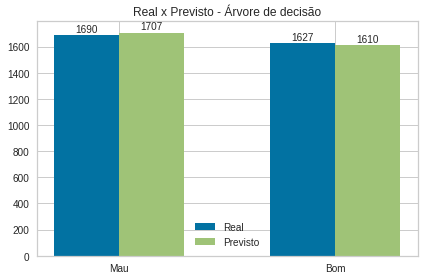

In [ ]:
#avaliando modelo, comparando valores previstos com valores reais
#Criando labels e os valores armazenados nas barras
labels = ['Mau', 'Bom']
count_testedt = [(y_teste == 'Mau').sum(), (y_teste == 'Bom').sum()]
count_previsaodt = [(previsoes_dt == 'Mau').sum(), (previsoes_dt == 'Bom').sum()]

#Criando as barras
b = np.arange(len(labels))
width = 0.3 #largura da barra

#Criando os plots
fig, ax = plt.subplots()
bar1 = ax.bar(b - width/2, count_testedt, width, label='Real')
bar2 = ax.bar(b + width/2, count_previsaodt, width, label='Previsto')

#dando nome ao gráfico 
ax.set_title('Real x Previsto - Árvore de decisão')
ax.set_xticks(b)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
          xy=(rect.get_x() + rect.get_width() /2, height), xytext=(0,1),
          textcoords='offset points', ha='center', va='bottom')
      
#Plotando o grafico de barras
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()
plt.show()

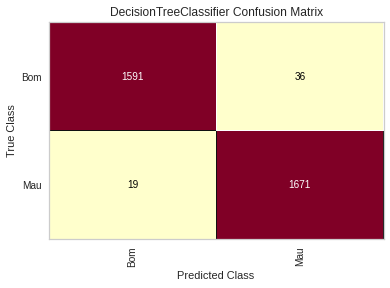

In [ ]:
#matriz de confusão árvore de decisão
cm_dt = ConfusionMatrix(classifier_dt)
cm_dt.fit(X_train, Y_train)
cm_dt.score(x_teste, y_teste)
cm_dt.poof()      

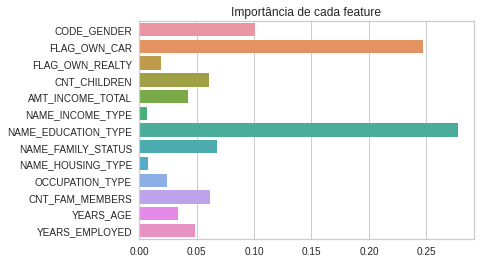

In [ ]:
#Verificando a importância de cada Feature no modelo
importance_dt = pd.Series(data=classifier_dt.feature_importances_,index=x.columns)
sab.barplot(x=importance_dt, y=importance_dt.index, orient='h').set_title('Importância de cada feature');

### **APRESENTAÇÃO DOS RESULTADOS DA FLORESTA ALEATÓRIA**

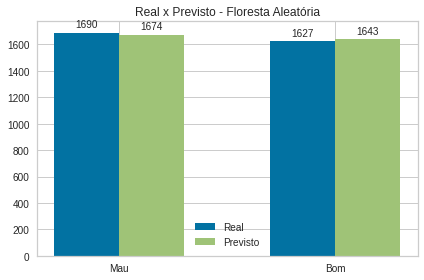

In [ ]:
#avaliando modelo, comparando valores previstos com valores reais
#Criando labels e os valores armazenados nas barras
labels = ['Mau', 'Bom']
count_testerf = [(y_teste == 'Mau').sum(), (y_teste == 'Bom').sum()]
count_previsoesrf = [(previsoes_rf == 'Mau').sum(), (previsoes_rf == 'Bom').sum()]

#Criando as barras
b = np.arange(len(labels))
width = 0.3 #largura da barra

#Criando os plots
fig, ax = plt.subplots()
bar1 = ax.bar(b - width/2, count_testerf, width, label='Real')
bar2 = ax.bar(b + width/2, count_previsoesrf, width, label='Previsto')

#dando nome ao gráfico 
#ax.set_ylabel('Intancias')
ax.set_title('Real x Previsto - Floresta Aleatória')
ax.set_xticks(b)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
          xy=(rect.get_x() + rect.get_width() /2, height), xytext=(0,3),
          textcoords='offset points', ha='center', va='bottom')
      
#Plotando o grafico de barras
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

plt.show()


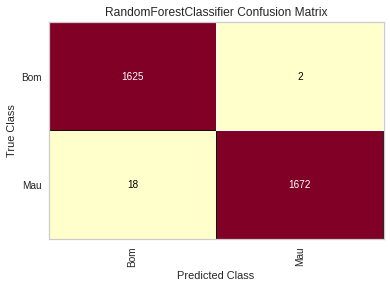

In [ ]:
#matriz de confusão floresta aleatória
cm_rf = ConfusionMatrix(classifier_rf)
cm_rf.fit(X_train, Y_train)
cm_rf.score(x_teste, y_teste)
cm_rf.poof()

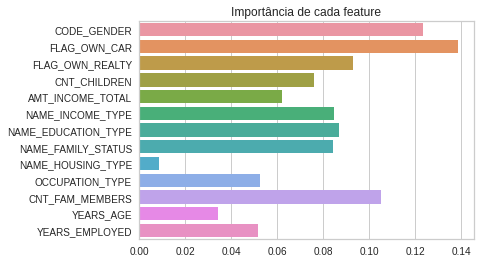

In [ ]:
#Verificando a importância de cada Feature no modelo
importance_rf = pd.Series(data=classifier_rf.feature_importances_,index=x.columns)
sab.barplot(x=importance_rf, y=importance_rf.index, orient='h').set_title('Importância de cada feature');